In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.colors import LogNorm
import seaborn as sns
from functools import partial
%matplotlib inline

In [9]:
x1 = np.random.randint(1,1e7,size=1000)
x2 = np.random.randint(1954,10008,size=1000)

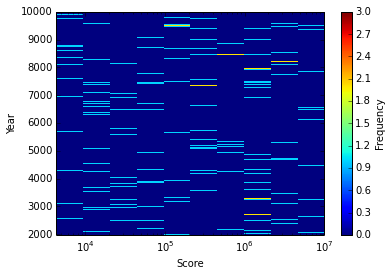

In [10]:
plt.hist2d(x1,x2,bins=[10,(x2.max() - x2.min())/5],norm=None)
cb = plt.colorbar()
cb.set_label("Frequency")
plt.xscale('log')
plt.xlabel('Score')
plt.ylabel('Year')

'0.4.dev'

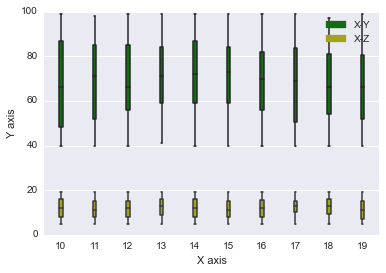

In [57]:
df = pd.DataFrame({"X": np.random.randint(10,20,1000),\
                   "Y": np.random.randint(40,100,size=1000), "Z": np.random.randint(5,20,size=1000)})
df.head()
sns.boxplot(df["Y"],df["X"],color="g",widths=0.1,label="X-Y")
sns.boxplot(df["Z"],df["X"],color="y",widths=0.1,label="X-Z")
plt.legend()
plt.xlabel("X axis")
#plt.xscale('log')
plt.ylabel("Y axis")
sns.__version__

[ 0.51717223  0.47890984  0.5171617   0.45927082  0.52797897] 5 [ 307.2127761   341.9587483   768.88990158  824.74684931  974.30574227]


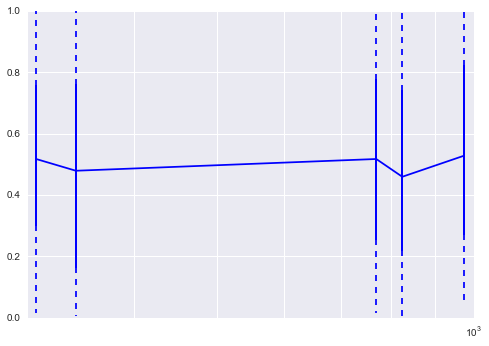

In [68]:
"""
Source: http://stackoverflow.com/questions/5938459/combining-plt-plotx-y-with-plt-boxplot
"""

# Generate some data...
data = np.random.random((100, 5))
y = data.mean(axis=0)
x = 1+(np.random.random(y.size) * 1000)
#x -= x.min()
x.sort()

print y, y.size, x

# Plot a line between the means of each dataset
plt.plot(x, y, 'b-')

# Save the default tick positions, so we can reset them...
locs, labels = plt.xticks() 

plt.boxplot(data, positions=x)
plt.xscale('log')
# Reset the xtick locations.
plt.xticks(locs)
plt.show()

In [22]:
print df.describe()
df["X"].quantile(0.75)
grouped = df.groupby("X").agg({"Y":{"mean": np.mean,"percentile_75": partial(np.percentile, q=75),\
                                    "percentile_25": partial(np.percentile, q=25)}})
grouped.columns = ['_'.join(k).strip() for k in grouped.columns.values]
grouped = grouped.reset_index()
grouped

                X           Y           Z
count  100.000000  100.000000  100.000000
mean     4.401000   66.420000   11.710000
std      4.180389   16.346117    4.321183
min      0.500000   41.000000    5.000000
25%      0.700000   53.000000    8.000000
50%      3.000000   64.500000   12.000000
75%     10.000000   78.500000   15.250000
max     11.200000   99.000000   19.000000

[8 rows x 3 columns]


,X,Y_percentile_75,Y_percentile_25,Y_mean
0,0.5,87.5,55.0,69.391304
1,0.7,76.0,51.0,63.142857
2,3.0,77.0,49.0,63.153846
3,5.7,78.0,61.0,68.235294
4,10.0,77.0,54.0,64.090909
5,11.2,75.5,58.5,68.933333


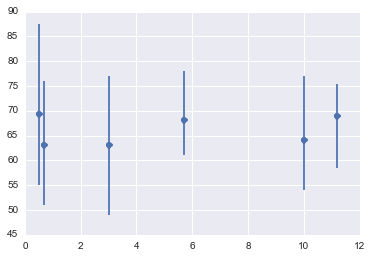

In [41]:
plt.errorbar(grouped["X"],grouped["Y_mean"],\
             yerr=[grouped["Y_mean"]-grouped["Y_percentile_25"],grouped["Y_percentile_75"]-grouped["Y_mean"]],fmt='o')
plt.gca().set_xmargin(1)

In [46]:
df.head()

,X,Y,Z
0,14,57,6
1,16,87,14
2,16,87,18
3,18,77,9
4,14,77,13


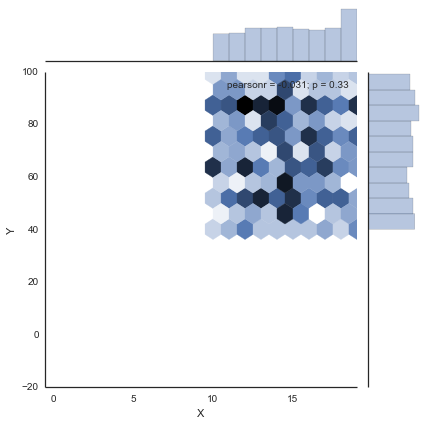

In [47]:
with sns.axes_style("white"):
    sns.jointplot(df["X"], df["Y"], kind="hex");
plt.autoscale()

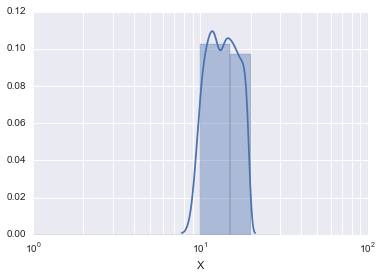

In [66]:
#plt.hist(df["X"],alpha=0.3)
sns.distplot(df["X"],bins=[0,1,10,15,20,30])
plt.xscale('log')

In [58]:
x = np.linspace(1, 100 * np.pi, 50)
y = np.sin(x ** 2)*4+10
err = np.random.rand(x.size)

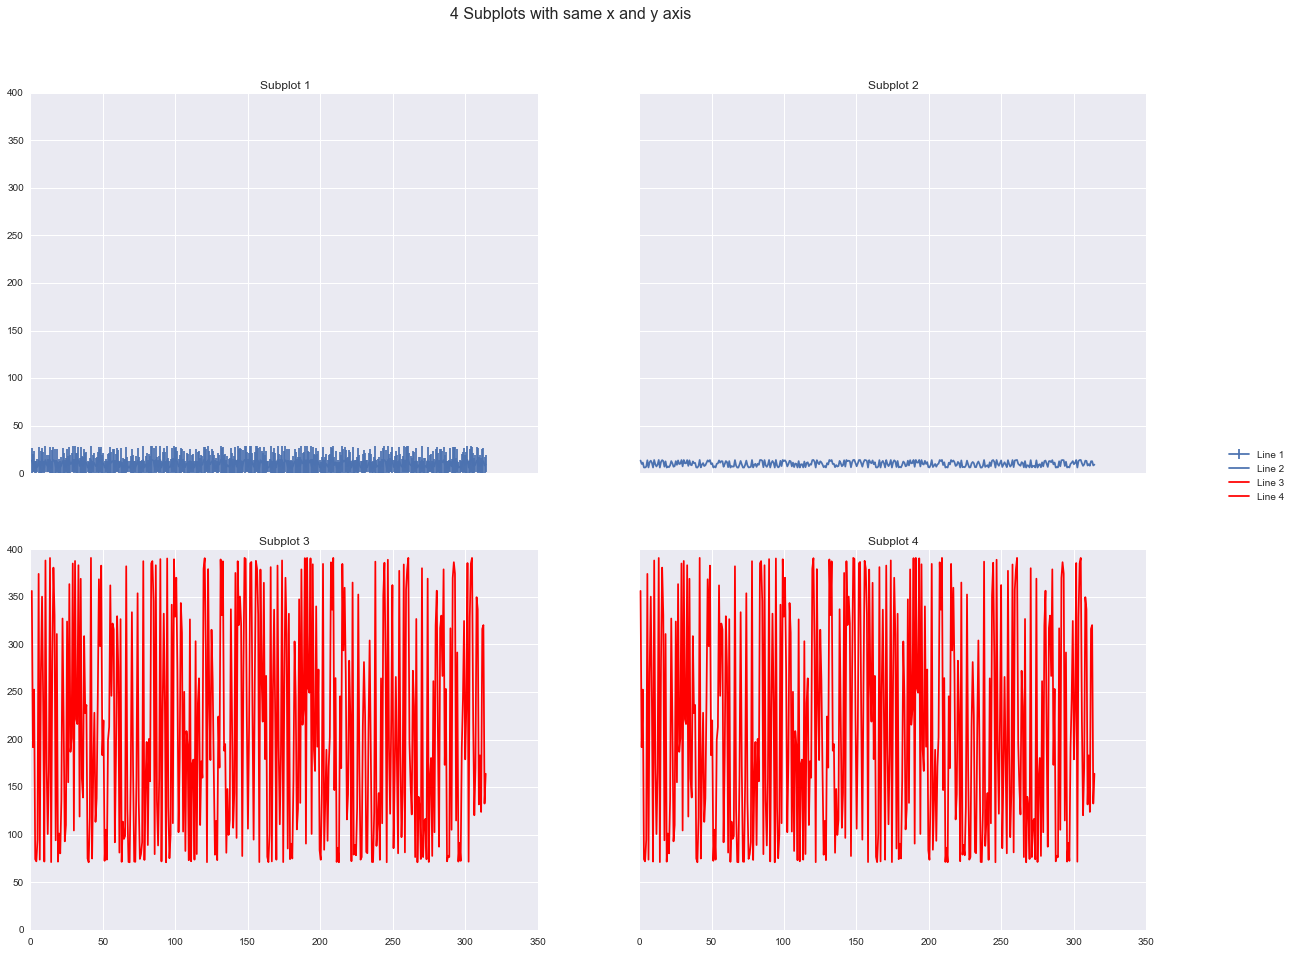

In [54]:
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True, sharey=True,figsize=(20,15))
l1 = ax1.errorbar(x, y,[y-err,y+err])
ax1.set_title('Subplot 1')
l2, = ax2.plot(x, y)
ax2.set_title('Subplot 2')
l3, = ax3.plot(x, 2 * y ** 2 - 1, color='r')
ax3.set_title('Subplot 3')
l4, = ax4.plot(x, 2 * y ** 2 - 1, color='r')
ax4.set_title('Subplot 4')
plt.suptitle("4 Subplots with same x and y axis",fontsize=16)
plt.figlegend((l1,l2,l3,l4),("Line 1","Line 2", "Line 3", "Line 4"), "right")

In [34]:
from collections import OrderedDict

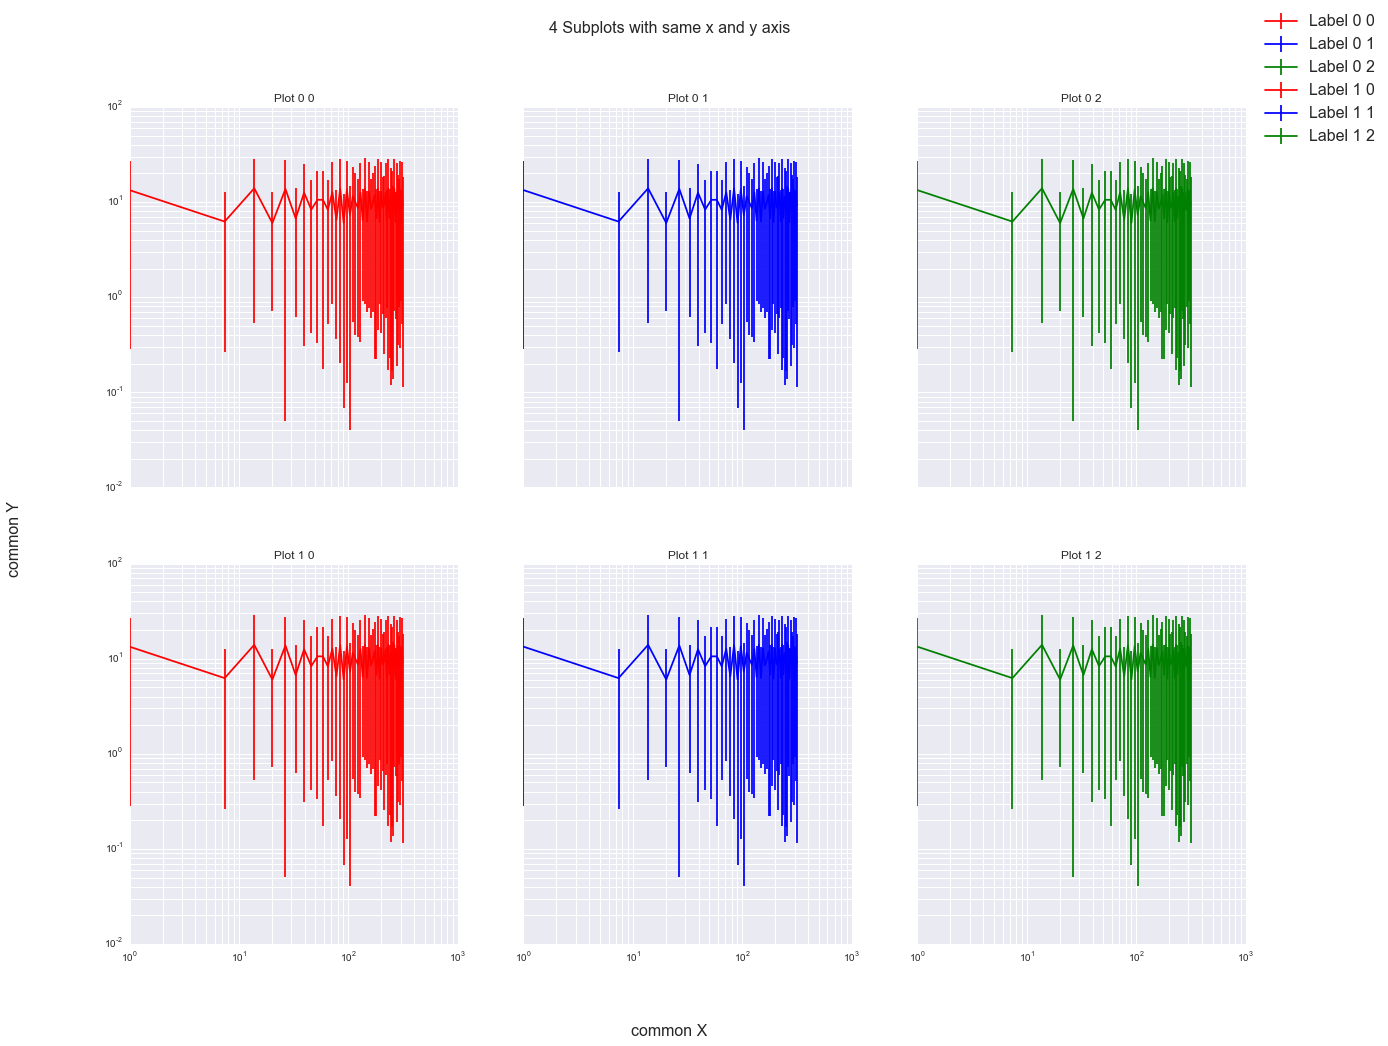

In [66]:
fig, ax = plt.subplots(2, 3, sharex=True, sharey=True,figsize=(20,15))
legends = OrderedDict()
colors = ['r','b','g']
for i in range(2):
    for j in range(3):
        l = ax[i][j].errorbar(x,y,[y-err,y+err],color=colors[j],label="Label %s %s" % (i,j))
        ax[i][j].set_title("Plot %s %s" % (i,j))
        ax[i][j].set_xscale('log')
        ax[i][j].set_yscale('log')
        legends["Label %s %s" % (i,j)] = l
plt.suptitle("4 Subplots with same x and y axis",fontsize=16)
plt.figlegend(legends.values(),legends.keys(), "upper right",fontsize=16)
fig.text(0.5, 0.04, 'common X', ha='center', fontsize=16)
fig.text(0.04, 0.5, 'common Y', va='center', rotation='vertical', fontsize=16)

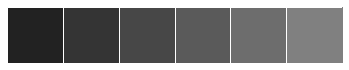

In [8]:
sns.palplot(sns.dark_palette("grey"))

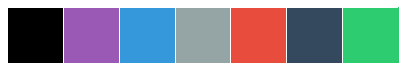

In [11]:
sns.palplot(sns.color_palette(["#000000", "#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]))

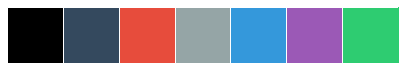

In [12]:
sns.palplot(sns.color_palette(["#000000", "#34495e", "#e74c3c", "#95a5a6", "#3498db", "#9b59b6", "#2ecc71"]))